How do Precision, Recall, and Specificity work together?

How do they all change with the underlying distribution/skew of data?

How are each useful?

In [1]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [2]:
labels_test = [1 for _ in range(5)] + [0 for _ in range(5)]
labels_pred = [1 for _ in range(4)] + [0 for _ in range(5)] + [1 for _ in range(1)]
print(classification_report(labels_test, labels_pred, digits=4))

              precision    recall  f1-score   support

           0     0.8000    0.8000    0.8000         5
           1     0.8000    0.8000    0.8000         5

    accuracy                         0.8000        10
   macro avg     0.8000    0.8000    0.8000        10
weighted avg     0.8000    0.8000    0.8000        10



In [3]:
labels_test = [1 for _ in range(2)] + [0 for _ in range(8)]
labels_pred = [1 for _ in range(1)] + [0 for _ in range(8)] + [1 for _ in range(1)]
print(classification_report(labels_test, labels_pred, digits=4))

              precision    recall  f1-score   support

           0     0.8750    0.8750    0.8750         8
           1     0.5000    0.5000    0.5000         2

    accuracy                         0.8000        10
   macro avg     0.6875    0.6875    0.6875        10
weighted avg     0.8000    0.8000    0.8000        10



In [4]:
labels_test = [1 for _ in range(10)] + [0 for _ in range(10)]
labels_pred = [1 for _ in range(5)] + [0 for _ in range(10)] + [1 for _ in range(5)]
print(classification_report(labels_test, labels_pred, digits=4))

              precision    recall  f1-score   support

           0     0.5000    0.5000    0.5000        10
           1     0.5000    0.5000    0.5000        10

    accuracy                         0.5000        20
   macro avg     0.5000    0.5000    0.5000        20
weighted avg     0.5000    0.5000    0.5000        20



In [5]:
# size of data (1000)
# skew in data (what % is 1)
# %tp, %tn

def get_arrays(percent_positive, sensitivity, specificity, n = 1000):
    P = round(n * percent_positive)
    N = n - P
    TP = round(P * sensitivity)
    FN = P - TP
    TN = round(N * specificity)
    FP = N - TN

    labels_test = [1 for _ in range(P)] + [0 for _ in range(N)]
    labels_pred = [1 for _ in range(TP)] + [0 for _ in range(FN+TN)] + [1 for _ in range(FP)]

    return labels_test, labels_pred

In [6]:
def measure(labels_test, labels_pred):
    report = classification_report(labels_test, labels_pred, output_dict=True)

    sensitivity = report['1']['recall']
    specificity = report['0']['recall']
    precision = report['1']['precision']
    f1_score = report['1']['f1-score']
    accuracy = report['accuracy']

    return sensitivity, specificity, precision, f1_score, accuracy

In [7]:
measure(*get_arrays(0.01, 0.95, 0.95, n = 100000))

(0.95, 0.95, 0.16101694915254236, 0.27536231884057966, 0.95)

In [8]:
measure(*get_arrays(0.01, 0.2, 0.99, n = 100000))

(0.2, 0.99, 0.16806722689075632, 0.18264840182648404, 0.9821)

In [9]:
measure(*get_arrays(0.01, 0.99, 0.2, n = 100000))

(0.99, 0.2, 0.012345679012345678, 0.02438723980785811, 0.2079)

In [10]:
# with fixed high sense & spec how does everything change with skew
def graph_how_things_change_as_perc_changes(sensitivity, specificity):
    x = [(x * 0.01) for x in range(0,101)]

    precision = []
    f1_score = []
    accuracy = []

    for x_i in x:
        _, _, precision_i, f1_score_i, accuracy_i = measure(*get_arrays(x_i, sensitivity, specificity))
        precision.append(precision_i)
        f1_score.append(f1_score_i)
        accuracy.append(accuracy_i)

    plt.axis([0, 1, 0, 1])
    plt.plot(x, precision, label="precision")
    plt.plot(x, f1_score, label="f1_score")
    plt.plot(x, accuracy, label="accuracy")
    plt.legend()
    plt.show()

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


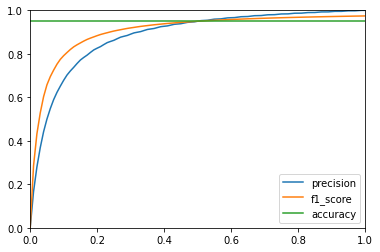

In [11]:
graph_how_things_change_as_perc_changes(0.95, 0.95)

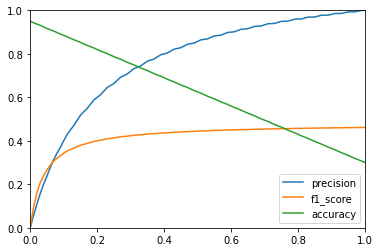

In [12]:
graph_how_things_change_as_perc_changes(0.3, 0.95)

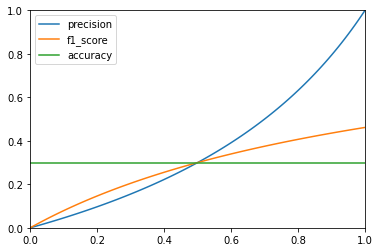

In [13]:
graph_how_things_change_as_perc_changes(0.3, 0.3)

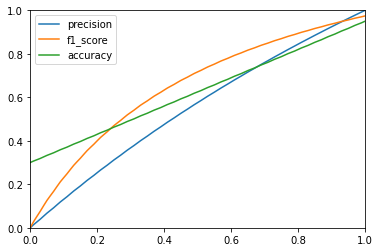

In [14]:
graph_how_things_change_as_perc_changes(0.95, 0.3)

In [15]:
# what is the probability of having the disease given I have a positive result?
# TP/(FP+TP) PPV (precision)
# what is the probability of not having the disease given I have a negative result?
# TN/(FN+TN) NPV

# as the sensitivity increases how does it affect the probability of having 
# with fixed high sense & spec how does everything change with skew

# snout spin

def graph_how_precision_(sensitivity):
    for specificity in range(9,100,10):
        specificity = specificity * 0.01
        
        x = [(x * 0.01) for x in range(0,101,5)]
        precisions = []
        NPVs = []

        for x_i in x:
            labels_test, labels_pred = get_arrays(x_i, sensitivity, specificity)
            report = classification_report(labels_test, labels_pred, output_dict=True)

            precision = report['1']['precision']
            NPV = report['0']['precision']

            precisions.append(precision)
            NPVs.append(NPV)


        specificity_alpha = 0.5 + specificity/2
        plt.plot(x, precisions, label=f"precision at {round(specificity * 100)}", color=(0.1, 0.2, 0.5, specificity_alpha))
        plt.plot(x, NPVs, label=f"NPV at {round(specificity * 100)}", color=(0.1, 0.5, 0.2, specificity_alpha))


    plt.axis([0, 1, 0, 1])
    plt.legend(loc="lower center")
    plt.show()

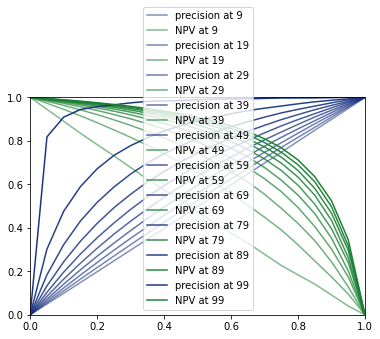

In [16]:
graph_how_precision_(sensitivity=0.90)

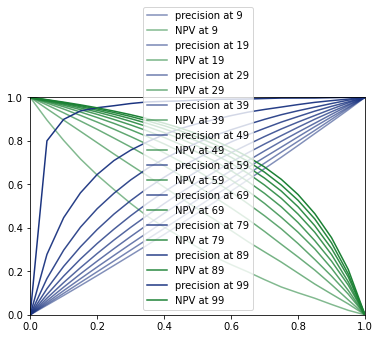

In [17]:
graph_how_precision_(sensitivity=0.80)